In [4]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline



# Using Tensorflow Keras instead of the original Keras

from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense




In [5]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [6]:
xtrain.shape


(60000, 28, 28)

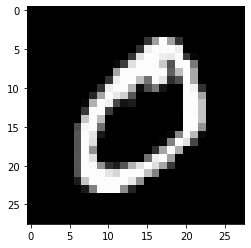

In [11]:
plt.imshow(xtrain[1,:,:],cmap='gray')

In [12]:
ytrain[1]

0

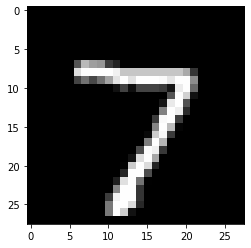

In [13]:
plt.imshow(xtest[0,:,:],cmap='gray')

In [14]:
ytrain[:50]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3], dtype=uint8)

In [15]:
L=pd.DataFrame(ytrain)
L[0].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: 0, dtype: int64

In [16]:
#Represent Training & Testing samples suitable for #tensorflow backend
x_train=xtrain.reshape(xtrain.shape[0],784).astype('float32')
x_test=xtest.reshape(xtest.shape[0],784).astype('float32')


In [17]:
x_test.shape

(10000, 784)

In [18]:
x_train/=255
x_test/=255

In [19]:
from tensorflow import keras

y_train = keras.utils.to_categorical(ytrain, 10)
y_test = keras.utils.to_categorical(ytest, 10)

In [20]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [21]:
# Initialize the constructor

model = Sequential()

In [22]:
# Define model architecture

model.add(Dense(784,activation='relu'))
model.add(Dense(100, activation ='relu'))
model.add(Dense(10,activation='softmax'))

In [23]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
model.fit(x_train, y_train, epochs=10, batch_size=256, verbose=1) 

Epoch 1/10
235/235 [==============================] - 3s 14ms/step - loss: 0.2745 - accuracy: 0.9201
Epoch 2/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0976 - accuracy: 0.9712
Epoch 3/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0608 - accuracy: 0.9819
Epoch 4/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0412 - accuracy: 0.9872
Epoch 5/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0289 - accuracy: 0.9912
Epoch 6/10
235/235 [==============================] - 4s 15ms/step - loss: 0.0211 - accuracy: 0.9936
Epoch 7/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0166 - accuracy: 0.9951
Epoch 8/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0108 - accuracy: 0.9971
Epoch 9/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0085 - accuracy: 0.9978
Epoch 10/10
235/235 [==============================] - 4s 15ms/step - loss: 0.0085 - accura

In [25]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.984
Loss: 0.064


In [26]:
y_predict = model.predict(x_test)

In [27]:
y_predict[0]

array([2.1453077e-10, 1.6488293e-09, 2.7470335e-09, 5.0039392e-07,
       1.5020321e-13, 7.4294002e-11, 6.4080982e-15, 9.9999952e-01,
       2.8646932e-11, 1.6746572e-09], dtype=float32)

In [28]:
np.argmax(y_predict[0])

7

In [29]:
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))
#print(y_pred)    
#convert 0 1 to 1 and 1 0 as 0
cm = metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[ 970    0    0    0    0    2    2    1    3    2]
 [   0 1126    3    0    0    1    2    1    2    0]
 [   0    0 1018    1    1    0    2    5    5    0]
 [   0    0    4  996    0    4    0    1    2    3]
 [   0    0    2    1  968    0    5    0    1    5]
 [   1    0    0   10    2  868    4    1    4    2]
 [   3    2    1    1    3    3  945    0    0    0]
 [   0    1    8    1    2    0    0 1009    4    3]
 [   0    0    3    4    2    3    2    3  955    2]
 [   2    2    0    3    9    2    0    3    3  985]]


In [30]:
cr=metrics.classification_report(ytest,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.99      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

